In [1]:
import numpy as np
import os, sys
import pandas as pd
import pybedtools as pbt
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("/dors/capra_lab/users/fongsl/tools/py_")
import config_readwrite as crw
import fet
import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

# functions

In [2]:
def check_section(config, section):
    if config.has_section(section) is False:
        config.add_section(section)
        
    return config

def pbtInt(a, b, out):
    A, B = pbt.BedTool(a), pbt.BedTool(b)
    
    C = A.intersect(B, wao=True, output=out)
    
    return C

# config

In [3]:
cfn = os.path.join(os.path.dirname(os.getcwd()), "config")
config, cfn = crw.read_config(cfn)

## read

In [4]:
# read
BED = config["CIS_TRANS"]["regions"]
ANNOT = config["CIS_TRANS"]["regions_annotations"]
SHUF=config["SHUFFLES"]["shuf-all"]

## write

In [5]:
section = 'cCRE'
config = check_section(config, section)

RE = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/cCRE"
GM = "/dors/capra_lab/data/encode/encode3_hg38/cCRE/GM12878/GM12878.bed"
out = os.path.join(RE, "regions.x.GM12878.cCRE.bed")
out_shuf = os.path.join(RE, "shuf.regions.x.GM12878.cCRE.bed")


config[section]["GM12878"] = GM
config[section]["results"] = RE
config[section]["regions.x.GM12878"] = out
config[section]["shufregions.x.GM12878"] = out_shuf

out_results = os.path.join(RE, "regions.x.GM12878.cCRE.enrichments.tsv")
config[section]["regions.x.GM12878.results"] = out_results

crw.write(config, cfn)

# intersection

In [6]:

if os.path.exists(out) is False:
    C = pbtInt(BED, GM, out)
config[section]["regions.x.GM12878"] = out


if os.path.exists(out_shuf) is False:
    C = pbtInt(SHUF, GM, out_shuf)
config[section]["shuf.regions.x.GM12878"] = out
crw.write(config, cfn)

# review results

## atac-starr

In [7]:
names = ["#chr", "start", "end", "region_id", "chr_cCRE", "startcCRE", "endcCRE", 'cCRE_id', "label", "len"]
df = pd.read_csv(out, sep='\t', header=None, names=names)
print(df.shape)

ccre_annots = df["label"].unique()
df.head()

(21419, 10)


,#chr,start,end,region_id,chr_cCRE,startcCRE,endcCRE,cCRE_id,label,len
0,chr1,959034,959154,chr1:959034-959154,chr1,959147,959495,EH38E1310295,PLS,7
1,chr1,1002089,1002179,chr1:1002089-1002179,chr1,1001796,1002146,EH38E1310350,"DNase-H3K4me3,CTCF-bound",57
2,chr1,1064140,1064260,chr1:1064140-1064260,chr1,1064172,1064505,EH38E1310431,pELS,88
3,chr1,1214948,1215208,chr1:1214948-1215208,chr1,1214741,1215005,EH38E1310634,Low-DNase,57
4,chr1,1214948,1215208,chr1:1214948-1215208,chr1,1215146,1215476,EH38E1310635,Low-DNase,62


## shuffles

In [8]:
shuf = pd.read_csv(out_shuf, sep='\t', header=None, names=names)
print(shuf.shape)
shuf.head()

(202581, 10)


,#chr,start,end,region_id,chr_cCRE,startcCRE,endcCRE,cCRE_id,label,len
0,chr5,115170417,115170537,chr1:959034-959154,chr5,115170323,115170528,EH38E2400346,Low-DNase,111
1,chr4,37686249,37686339,chr1:1002089-1002179,chr4,37686063,37686379,EH38E2290604,PLS,90
2,chr20,32762661,32762781,chr1:1064140-1064260,.,-1,-1,.,.,0
3,chr7,98133420,98133680,chr1:1214948-1215208,chr7,98133188,98133538,EH38E2574059,Low-DNase,118
4,chr7,98133420,98133680,chr1:1214948-1215208,chr7,98133670,98133981,EH38E2574060,Low-DNase,10


## annots

In [9]:
annot = pd.read_csv(ANNOT, sep='\t')
annot.head()

,#chr,start,end,region_id,conserved_active.regions,cis,trans,trans_only,cis_only,cis+trans,...,HH-active_MM-inactive_MH-inactive_cis,HH-active_MM-inactive_HM-inactive_trans,HH-active_MM-inactive_cis-only,HH-active_MM-inactive_trans-only,HH-active_MM-inactive_cis+trans,MM-active_HH-inactive_HM-inactive_cis,MM-active_HH-inactive_MH-inactive_trans,MM-active_HH-inactive_cis-only,MM-active_HH-inactive_trans-only,MM-active_HH-inactive_cis+trans
0,chr1,959034,959154,chr1:959034-959154,0.0,1.0,1.0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,chr1,1002089,1002179,chr1:1002089-1002179,0.0,1.0,1.0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,chr1,1064140,1064260,chr1:1064140-1064260,0.0,1.0,0.0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr1,1214948,1215208,chr1:1214948-1215208,0.0,1.0,1.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,chr1,1215328,1215508,chr1:1215328-1215508,0.0,1.0,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [10]:
col = 'HH_active'

pos = annot.loc[annot[col]==1, "region_id"]
a  = ccre_annots[0]
a
#for a in ccre_annots:

'PLS'

                                cCRE annot+     cCRE annot- 
                    HH_active    A               B
    matched_shuffle HH_active    C               D

In [11]:
# add groups to enrichment analysis

ccre_annots=list(ccre_annots)

ccre_annots.append([
                'PLS',
                'PLS,CTCF-bound',
                'dELS',
                'dELS,CTCF-bound',
                'pELS',
                'pELS,CTCF-bound'
                ])

ccre_annots.append([
                'PLS',
                'PLS,CTCF-bound'
                
                ])
ccre_annots.append([
                'dELS',
                'dELS,CTCF-bound'
                ])

ccre_annots.append([
               'pELS',
                'pELS,CTCF-bound'
                ])


collection={}
cols = ['HH_active', "MM_active", "conserved_active.regions"]
for col in cols:
    pos = annot.loc[annot[col]==1, "region_id"]
    for a in ccre_annots:
        if type(a) is str:
            a = a.split()

        # get dataset and matched shuffle ids
        test = df.loc[df["region_id"].isin(pos)]
        test_shuf = shuf.loc[~shuf["region_id"].isin(pos)]

        # within set, how many elements have annotation, or don't.
        in_annot = test.loc[test["label"].isin(a)].shape[0]
        out_annot = test.loc[~test["label"].isin(a)].shape[0]

        # and in the shuffles?
        inshuf_annot = test_shuf.loc[test_shuf["label"].isin(a)].shape[0]
        outshuf_annot = test_shuf.loc[~test_shuf["label"].isin(a)].shape[0]

        result = fet.get_2x2(in_annot, out_annot, inshuf_annot,outshuf_annot, f"regions_x_shuf_{col}.{a}")
        result["col"], result["cCRE_annot"] = col, "_".join(a)
        key="_".join(a)+"."+col

        collection[key] = result

[[3200, 9711], [9377, 72110]]
regions_x_shuf_HH_active.['PLS'] [[3200, 9711], [9377, 72110]] 2.534064143410776 1.65675e-319
[[86, 12825], [1736, 79751]]
regions_x_shuf_HH_active.['DNase-H3K4me3,CTCF-bound'] [[86, 12825], [1736, 79751]] 0.3080544551342514 6.185859243750712e-37
[[2841, 10070], [11506, 69981]]
regions_x_shuf_HH_active.['pELS'] [[2841, 10070], [11506, 69981]] 1.7159219808636605 3.387792342849383e-109
[[1421, 11490], [22827, 58660]]
regions_x_shuf_HH_active.['Low-DNase'] [[1421, 11490], [22827, 58660]] 0.317809788333735 0.0
[[859, 12052], [3442, 78045]]
regions_x_shuf_HH_active.['PLS,CTCF-bound'] [[859, 12052], [3442, 78045]] 1.6161001098667347 2.0107006477318057e-31
[[698, 12213], [7326, 74161]]
regions_x_shuf_HH_active.['.'] [[698, 12213], [7326, 74161]] 0.5785511064312342 2.0892857032989282e-46
[[2279, 10632], [8435, 73052]]
regions_x_shuf_HH_active.['dELS'] [[2279, 10632], [8435, 73052]] 1.8564206076387262 8.604731874997554e-117
[[201, 12710], [2648, 78839]]
regions_x_s

## FDR correction 

In [12]:
fdr_res = fet.fdr_correction(collection)

/home/fongsl/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


## fraction of annotations 

In [13]:
fdr_res["frac"] = fdr_res["a"]/(fdr_res["a"]+fdr_res["b"])
fdr_res["frac_shuf"] = fdr_res["c"]/(fdr_res["c"]+fdr_res["d"])
fdr_res.loc[fdr_res["cCRE_annot"]==".", "cCRE_annot"] = 'no_overlap'
fdr_res["FDR_P2"]= fdr_res["FDR_P"].apply(lambda x: "{:.1E}".format(x))

## WRITE results

In [14]:
col_order = [
            'comparison',
            'col',
            'cCRE_annot',
            'frac',
            'OR',
            'FDR_P',
            'a',
            'b',
            'c',
            'd',
            'P',
            'ci_lower',
            'ci_lower_diff',
            'ci_upper',
            'ci_upper_diff',
            'OR_log2',
            'ci_lower_log2',
            'ci_upper_log2',
            'reject_null',
            'asterisks',
            '-log10p',
            'frac_shuf',
            'FDR_P2'
]
fdr_res[col_order].to_csv(out_results, sep='\t', index=False)

## plot results

In [15]:
def orderIndex(hue_order):
    
    # this index order was determined by high to low fraction of overlap in each dataset. 
    index_order =['PLS',
                'pELS',
                'dELS',
                'Low-DNase',
                'no_overlap',
                'PLS,CTCF-bound',
                'pELS,CTCF-bound',
                'dELS,CTCF-bound',
                'CTCF-only,CTCF-bound',
                'DNase-only',
                'DNase-H3K4me3',
                'DNase-H3K4me3,CTCF-bound',
             ]

    final_order = []
    
    for h in hue_order:
        for i in index_order:
            final_order.append((h,i))
    return final_order

def reindexForPlotting(x, hue, data, hue_order):
     # indexing hell
    final_order = orderIndex(hue_order)  # another function to set index
    data= data.set_index([hue,x])  # micro, macro grouping order matters for reindexing
    data=data.reindex(final_order).reset_index()
    
    return data # indexed w/ orderIndex function

## HH active fraction

In [16]:
# summarize annotations
fdr_res["regulatory"] = None
regulatory_annots = [
                'PLS',
                'PLS,CTCF-bound',
                'dELS',
                'dELS,CTCF-bound',
                'pELS',
                'pELS,CTCF-bound'
                ]
dnase = [
    'DNase-H3K4me3',
 'DNase-H3K4me3,CTCF-bound',
 'DNase-only',
]
low_signal = [
     'Low-DNase',
    'no_overlap',".",
]

ctcf=['CTCF-only,CTCF-bound']

fdr_res.loc[fdr_res["cCRE_annot"].isin(regulatory_annots), "regulatory"] = "PLS/pELS/dELS"
fdr_res.loc[fdr_res["cCRE_annot"].isin(ctcf), "regulatory"] = "CTCF-only"
fdr_res.loc[fdr_res["cCRE_annot"].isin(dnase), "regulatory"] = "DNase"
fdr_res.loc[fdr_res["cCRE_annot"].isin(low_signal), "regulatory"] = "low, no signal"


## fraction overlap

In [17]:
fdr_res.loc[fdr_res["col"]=="HH_active"].groupby([
    "regulatory",
    
    #"col"
])["frac"].sum().reset_index()

,regulatory,frac
0,CTCF-only,0.022461
1,DNase,0.031059
2,PLS/pELS/dELS,0.782356
3,"low, no signal",0.164124


## fet odds ratio

In [28]:
fdr_res.loc[(fdr_res["col"]=="HH_active")& (fdr_res["regulatory"].astype(str)=="None")]

,a,b,c,d,OR,P,ci_lower,ci_lower_diff,ci_upper,ci_upper_diff,...,col,cCRE_annot,reject_null,FDR_P,asterisks,-log10p,frac,frac_shuf,FDR_P2,regulatory
0,10101,2810,37352,44135,4.247441,0.000000e+00,4.064547,0.063499,4.438564,0.063499,...,HH_active,"PLS_PLS,CTCF-bound_dELS_dELS,CTCF-bound_pELS_p...",True,0.000000e+00,*,inf,0.782356,0.458380,0.0E+00,None
0,4059,8852,12819,68668,2.456280,0.000000e+00,2.356042,0.060110,2.560783,0.060110,...,HH_active,"PLS_PLS,CTCF-bound",True,0.000000e+00,*,inf,0.314383,0.157313,0.0E+00,None
0,2647,10264,10158,71329,1.810903,9.781434e-123,1.726873,0.068548,1.899023,0.068548,...,HH_active,"dELS_dELS,CTCF-bound",True,2.608382e-122,*,121.583629,0.205019,0.124658,2.6E-122,None
0,3395,9516,14375,67112,1.665627,1.727101e-112,1.595325,0.062214,1.739026,0.062214,...,HH_active,"pELS_pELS,CTCF-bound",True,4.145042e-112,*,111.382471,0.262954,0.176409,4.1E-112,None


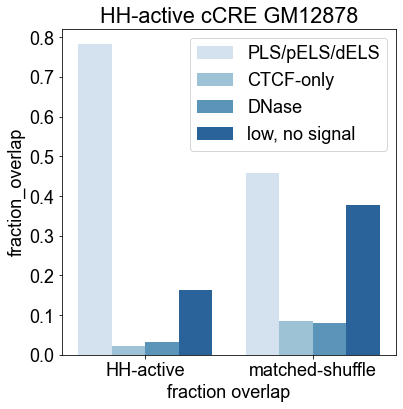

In [29]:
x="type"
y="frac"
hue="regulatory"
hue_order = ['PLS/pELS/dELS', 'CTCF-only', 'DNase',  'low, no signal']
data=fracs

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=x,y=y,data=data, palette="Blues", ax=ax,hue=hue, hue_order=hue_order)

ax.set(title=f"HH-active cCRE GM12878",
      xlabel="fraction overlap",
      #xlim=(-0.00,0.4),
       ylabel="fraction_overlap",
      )

ax.legend(bbox_to_anchor=(1,1))

outfig = os.path.join(RE, f"regions.HHactive.x.summarized.cCRE.GM12878-fraction.pdf")
#plt.savefig(outfig, bbox_inches="tight")